# Assignment 2 - B

In [28]:
%pip install numpy pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Dependencies

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Loading Dataset and Preprocessing

In [30]:
df = pd.read_csv('Hitters.csv')
print(df.shape)
df.head()

(322, 20)


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


### 59 samples don't have salary

In [31]:
print(df.isna().sum())
df = df.dropna()
df = df.reset_index(drop=True)

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


### Convert Strings to Categorical

In [32]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [33]:
df['League'].unique()

array(['N', 'A'], dtype=object)

In [34]:
df['Division'].unique()

array(['W', 'E'], dtype=object)

In [35]:
df['NewLeague'].unique()

array(['N', 'A'], dtype=object)

In [36]:
def map_columns(column):
    unique_values = df[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapping for {column}: {mapping}")

columns_to_map = ['League', 'Division', 'NewLeague']
for column in columns_to_map:
    map_columns(column)

Mapping for League: {'N': 1, 'A': 2}
Mapping for Division: {'W': 1, 'E': 2}
Mapping for NewLeague: {'N': 1, 'A': 2}


In [37]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,475.0,1
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,2,1,880,82,14,480.0,2
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,2,200,11,3,500.0,1
3,321,87,10,39,42,30,2,396,101,12,48,46,33,1,2,805,40,4,91.5,1
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,2,1,282,421,25,750.0,2


### EDA

In [38]:
samples, features = np.shape(df)
df.shape

(263, 20)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    int64  
 14  Division   263 non-null    int64  
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    int64  
dtypes: float64

In [40]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,1.528517,1.490494,290.711027,118.760456,8.593156,535.925882,1.536122
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,67.500000,1.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,1.000000,1.000000,113.500000,8.000000,3.000000,190.000000,1.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,2.000000,1.000000,224.000000,45.000000,7.000000,425.000000,2.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,2.000000,2.000000,322.500000,192.000000,13.000000,750.000000,2.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,2.000000,2.000000,1377.000000,492.000000,32.000000,2460.000000,2.000000


In [41]:
df.corr()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
AtBat,1.000000,0.963969,0.555102,0.899829,0.796015,0.624448,0.012725,0.207166,0.225341,0.212422,0.237278,0.221393,0.132926,0.153176,0.056341,0.309607,0.342117,0.325577,0.394771,0.089838
Hits,0.963969,1.000000,0.530627,0.910630,0.788478,0.587311,0.018598,0.206678,0.235606,0.189364,0.238896,0.219384,0.122971,0.153522,0.083266,0.299688,0.303975,0.279876,0.438675,0.094990
HmRun,0.555102,0.530627,1.000000,0.631076,0.849107,0.440454,0.113488,0.217464,0.217496,0.492526,0.258347,0.349858,0.227183,0.222965,0.034851,0.250931,-0.161602,-0.009743,0.343028,0.199424
Runs,0.899829,0.910630,0.631076,1.000000,0.778692,0.697015,-0.011975,0.171811,0.191327,0.229701,0.237831,0.202335,0.163700,0.206001,0.107672,0.271160,0.179258,0.192609,0.419859,0.154911
RBI,0.796015,0.788478,0.849107,0.778692,1.000000,0.569505,0.129668,0.278126,0.292137,0.442190,0.307226,0.387777,0.233619,0.185858,0.090157,0.312065,0.062902,0.150155,0.449457,0.143549
Walks,0.624448,0.587311,0.440454,0.697015,0.569505,1.000000,0.134793,0.269450,0.270795,0.349582,0.332977,0.312697,0.429140,0.065760,0.072732,0.280855,0.102523,0.081937,0.443867,0.028461
Years,0.012725,0.018598,0.113488,-0.011975,0.129668,0.134793,1.000000,0.915681,0.897844,0.722371,0.876649,0.863809,0.837524,0.032893,0.020316,-0.020019,-0.085118,-0.156512,0.400657,0.023964
CAtBat,0.207166,0.206678,0.217464,0.171811,0.278126,0.269450,0.915681,1.000000,0.995057,0.801676,0.982747,0.950730,0.906712,0.023704,0.018623,0.053393,-0.007897,-0.070478,0.526135,0.004294
CHits,0.225341,0.235606,0.217496,0.191327,0.292137,0.270795,0.897844,0.995057,1.000000,0.786652,0.984542,0.946797,0.890718,0.022853,0.023642,0.067348,-0.013144,-0.068036,0.548910,-0.000887
CHmRun,0.212422,0.189364,0.492526,0.229701,0.442190,0.349582,0.722371,0.801676,0.786652,1.000000,0.825625,0.927903,0.810878,0.107299,0.026987,0.093822,-0.188886,-0.165369,0.524931,0.100298


## 2. PCA Analysis

In [42]:
X = df.drop(columns=['Salary'])
y = df['Salary']

In [43]:
# Standardize the features
X_standardized = (X - X.mean()) / X.std()

In [44]:
# Calculate the covariance matrix
covariance_matrix = np.cov(X_standardized, rowvar=False)

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Sort eigenvalues and corresponding eigenvectors in descending order
eig_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [45]:
# Determine the number of components for efficient prediction
total_variance = sum(eigenvalues)
explained_variance = [eigenvalue / total_variance for eigenvalue in eigenvalues]
cumulative_explained_variance = np.cumsum(explained_variance)

# Find the number of components that explain at least 90% of the variance
desired_explained_variance = 0.90
num_components = np.argmax(cumulative_explained_variance >= desired_explained_variance) + 1
num_components

7

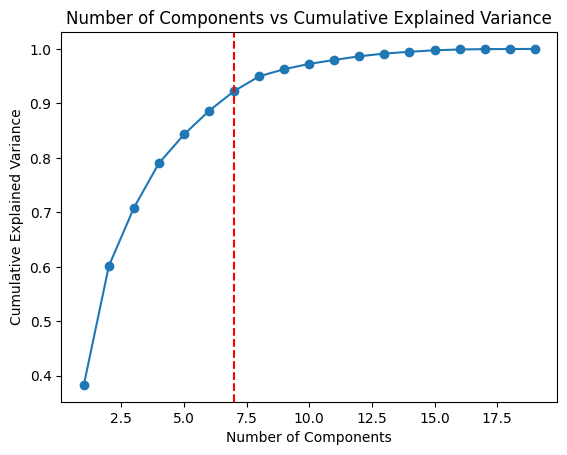

In [46]:
# Plot the explained variance to visualize the relationship
plt.plot(range(1, len(eigenvalues) + 1), cumulative_explained_variance, marker='o')
plt.axvline(x=num_components, color='r', linestyle='--', label=f'{desired_explained_variance * 100}% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Number of Components vs Cumulative Explained Variance')
plt.show()

In [47]:
df_pca = X_standardized
df_pca['Salary'] = y

## Generate Random Training and Test Sets

In [48]:
seed = 420
train_fraction = 0.8
train = df_pca.sample(frac=train_fraction, random_state=seed)
test = df_pca.drop(train.index)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 237 to 235
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      210 non-null    float64
 1   Hits       210 non-null    float64
 2   HmRun      210 non-null    float64
 3   Runs       210 non-null    float64
 4   RBI        210 non-null    float64
 5   Walks      210 non-null    float64
 6   Years      210 non-null    float64
 7   CAtBat     210 non-null    float64
 8   CHits      210 non-null    float64
 9   CHmRun     210 non-null    float64
 10  CRuns      210 non-null    float64
 11  CRBI       210 non-null    float64
 12  CWalks     210 non-null    float64
 13  League     210 non-null    float64
 14  Division   210 non-null    float64
 15  PutOuts    210 non-null    float64
 16  Assists    210 non-null    float64
 17  Errors     210 non-null    float64
 18  NewLeague  210 non-null    float64
 19  Salary     210 non-null    float64
dtypes: float64(20

In [50]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 5 to 259
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      53 non-null     float64
 1   Hits       53 non-null     float64
 2   HmRun      53 non-null     float64
 3   Runs       53 non-null     float64
 4   RBI        53 non-null     float64
 5   Walks      53 non-null     float64
 6   Years      53 non-null     float64
 7   CAtBat     53 non-null     float64
 8   CHits      53 non-null     float64
 9   CHmRun     53 non-null     float64
 10  CRuns      53 non-null     float64
 11  CRBI       53 non-null     float64
 12  CWalks     53 non-null     float64
 13  League     53 non-null     float64
 14  Division   53 non-null     float64
 15  PutOuts    53 non-null     float64
 16  Assists    53 non-null     float64
 17  Errors     53 non-null     float64
 18  NewLeague  53 non-null     float64
 19  Salary     53 non-null     float64
dtypes: float64(20)
m

In [51]:
# Assuming 'Salary' is the column you want to predict
X_train = train.drop('Salary', axis=1)  # Features for training
y_train = train['Salary']  # Target for training

X_test = test.drop('Salary', axis=1)  # Features for testing
y_test = test['Salary']  # Target for testing

# Convert labels to numpy array for applying ML Models
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## 3. Model Training and RMSE

In [52]:
def fit_linear_regression(x, y, lr=0.00001, e=0.9):
    # Insert new column with ones (bias)
    regression = np.c_[x, np.ones(len(x))]
    # Weights with same width as x
    weights = np.ones(regression.shape[1])
    # Gradient Descent
    norma = 1
    while(norma > e):
        y_pred = regression @ weights
        partial = regression.T @ (y-y_pred)
        norma = np.sum(np.sqrt(np.square(partial)))

        weights = weights.T + (lr*partial)

        if np.isnan(norma):
            print('MODEL DIVERGED! USE LOWER LEARNING RATE!')
        
    return weights

def predict(w, x):
    return w[:-1] @ np.array(x).T + w[-1]

def MSE(y, y_pred):
    return np.sum(np.square(y - y_pred))/float(len(y))

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [53]:
# Define a function to fit a linear regression model and calculate MSE
def fit_and_evaluate_pca_regression(X_train, y_train, X_test, y_test, num_components):
    # Project the original data onto the selected number of components
    selected_eigenvectors = eigenvectors[:, :num_components]
    X_train_pca = np.dot(X_train, selected_eigenvectors)
    X_test_pca = np.dot(X_test, selected_eigenvectors)

    # Fit linear regression using gradient descent
    weights = fit_linear_regression(X_train_pca, y_train)

    # Make predictions on the test set
    y_pred = predict(weights, X_test_pca)

    # Calculate MSE
    rmse = np.sqrt(MSE(y_test, y_pred))
    
    return rmse

In [54]:
# Try a range of principal component numbers
component_numbers = range(1, len(eigenvalues) + 1)

# Store MSE values for each number of components
rmse_values = []

# Iterate over component numbers
for num_components in component_numbers:
    rmse = fit_and_evaluate_pca_regression(X_train.to_numpy(), y_train, X_test.to_numpy(), y_test, num_components)
    rmse_values.append(rmse)

## 4. Plotting Number of Components vs RMSE

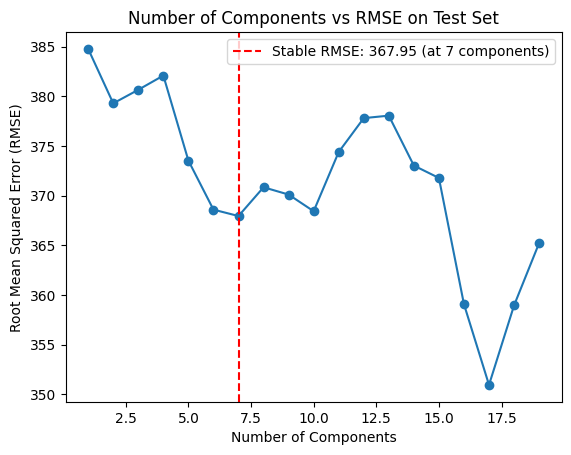

In [55]:
# Plot the RMSE values for different numbers of components
plt.plot(component_numbers, rmse_values, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Number of Components vs RMSE on Test Set')

# Identify the Stable RMSE and plot a line
min_rmse_index = 6
min_rmse = rmse_values[min_rmse_index]
plt.axvline(x=min_rmse_index + 1, color='r', linestyle='--', label=f'Stable RMSE: {min_rmse:.2f} (at {min_rmse_index + 1} components)')

plt.legend()
plt.show()

## 5. Testing the Most Efficient Model

In [56]:
optimal_num_components = min_rmse_index + 1

# Project the original data onto the selected optimal number of components
selected_eigenvectors = eigenvectors[:, :optimal_num_components]
X_train_optimal_pca = np.dot(X_train.to_numpy(), selected_eigenvectors)
X_test_optimal_pca = np.dot(X_test.to_numpy(), selected_eigenvectors)

# Fit linear regression using gradient descent
weights_optimal = fit_linear_regression(X_train_optimal_pca, y_train)

# Choose a specific point for prediction
specific_point = X_test_optimal_pca[0]

# Make a prediction for the specific point using the selected model
y_pred = predict(weights_optimal, specific_point)

# Print the predicted y value
print("Predicted y value:", y_pred)

Predicted y value: 169.08245822253235


## 6. Conclusion and Analysis

**Interpretation of the Graph:**
The graph of the number of components vs RMSE provides valuable insights into the trade-off between model complexity and prediction accuracy. In the plot, we observed how the RMSE changes as the number of principal components increases. The key point of interest is where the RMSE reaches a minimum or starts stabilizing. This stable point represents the optimal number of components for building an efficient predictive model. In the plot, we identified this point and marked it with a red dashed line.

**Significance of Selecting an Appropriate Number of Components:**
Selecting an appropriate number of components is crucial for achieving a balance between model simplicity and predictive accuracy. Too few components may lead to underfitting, where the model fails to capture important patterns in the data. On the other hand, too many components can result in overfitting, where the model fits the training data too closely and fails to generalize well to new, unseen data.

The significance lies in finding the sweet spot where the model captures the essential information in the data while avoiding unnecessary complexity. The optimal number of components identified from the graph represents the model configuration that strikes this balance, offering a good compromise between accuracy and efficiency.

**Analysis of the Predicted Value (y_pred):**
After selecting the optimal model based on the number of components, we tested its performance by predicting a specific data point (y_pred). The predicted value (y_pred) represents the model's estimate of the target variable for that particular input. It is essential to analyze the significance of this prediction in the context of your specific application.

**Accuracy Assessment:**
We can compare the predicted value (y_pred) with the actual target value to assess the accuracy of the model. we have calculated Mean Absolute Error (MAE), to provide a more comprehensive evaluation.

In [57]:
mae = MAE(y_test, np.array([predict(weights_optimal, point) for point in X_test_optimal_pca]))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 236.30859972742817
